In [1]:
#loading required modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import thinkstats2
import thinkplot
import statistics

In [2]:
#Get CSV dataset
df1 = pd.read_csv("C:/Users/Dan/Desktop/DSC530/Final Project/Data/2019cfbstatsfinal.csv")
df1.head()

,team,conference,wins,pf,pa,five_year_avg_recruit_rank,offensesuccessRate,defensesuccessRate,defensehavoctotal
0,Alabama,SEC,11,614,242,2.8,0.516285,0.386127,0.239306
1,Georgia,SEC,12,431,176,3.8,0.460722,0.356659,0.195260
2,Ohio State,Big Ten,13,656,192,6.2,0.494220,0.322093,0.281395
3,USC,Pac 12,8,422,382,8.8,0.489933,0.457516,0.198257
4,LSU,SEC,15,726,328,9.8,0.549020,0.357143,0.237425


In [3]:
#Provide basic statistics for attributes
df1.describe()

,wins,pf,pa,five_year_avg_recruit_rank,offensesuccessRate,defensesuccessRate,defensehavoctotal
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,7.187500,378.281250,321.250000,41.003125,0.426212,0.404381,0.214900
std,3.085424,111.801194,71.501582,22.335181,0.046824,0.040480,0.028833
min,2.000000,159.000000,176.000000,2.800000,0.327422,0.322093,0.163415
25%,5.000000,303.750000,275.000000,20.700000,0.398367,0.370277,0.194158
50%,7.500000,365.000000,324.500000,41.900000,0.427156,0.404907,0.211306
75%,9.000000,431.250000,378.500000,61.250000,0.450596,0.433590,0.230357
max,15.000000,726.000000,442.000000,82.000000,0.549020,0.488082,0.288483


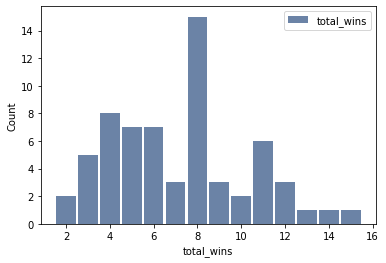

In [4]:
#Total Wins
#Shows most common win total was 8 wins
hist = thinkstats2.Hist(df1.wins, label='total_wins')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='total_wins', ylabel='Count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029393AB1F08>,
      dtype=object)

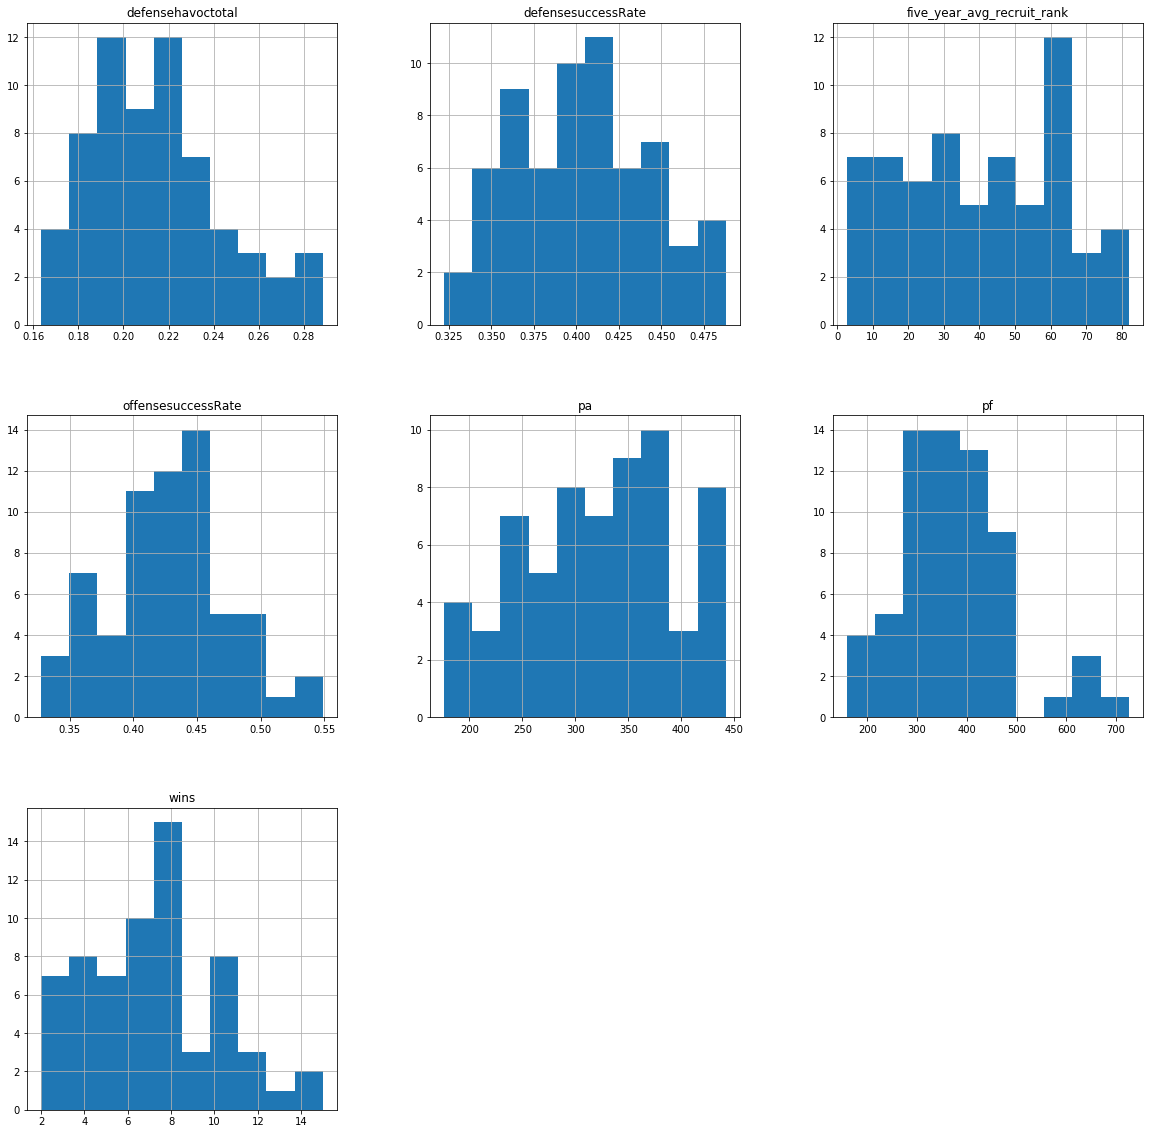

In [5]:
#histograms for all metrics
df1.hist(bins = 10, figsize = (20, 20))

In [10]:
#create dataframe for pmf of only SEC schoools
dfSEC = df1[(df1["conference"] == 'SEC') ]
dfSEC.head()

,team,conference,wins,pf,pa,five_year_avg_recruit_rank,offensesuccessRate,defensesuccessRate,defensehavoctotal
0,Alabama,SEC,11,614,242,2.8,0.516285,0.386127,0.239306
1,Georgia,SEC,12,431,176,3.8,0.460722,0.356659,0.195260
4,LSU,SEC,15,726,328,9.8,0.549020,0.357143,0.237425
8,Auburn,SEC,9,432,254,12.2,0.440733,0.356413,0.240636
11,Texas A&M,SEC,8,384,293,16.0,0.464821,0.382212,0.224760


In [8]:
#create data frame for pmf of all schools not in SEC
dfnotSEC = df1[(df1["conference"] != 'SEC') ]
dfnotSEC.head()

,team,conference,wins,pf,pa,five_year_avg_recruit_rank,offensesuccessRate,defensesuccessRate,defensehavoctotal
2,Ohio State,Big Ten,13,656,192,6.2,0.494220,0.322093,0.281395
3,USC,Pac 12,8,422,382,8.8,0.489933,0.457516,0.198257
5,Texas,Big 12,8,458,357,10.2,0.467380,0.435449,0.187090
6,Florida State,ACC,6,363,362,10.6,0.393057,0.416585,0.184390
7,Clemson,ACC,14,659,203,12.0,0.496676,0.339267,0.258639


In [12]:
#create SEC pmf
pmfSEC = thinkstats2.Pmf(dfSEC.wins, label='SECwins')

#create non SEC pmf
pmfnotSEC = thinkstats2.Pmf(dfnotSEC.wins, label='otherwins')



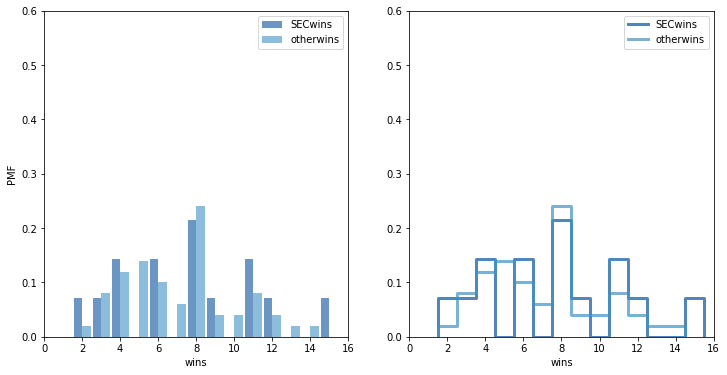

In [14]:
#pmf comparison of wins by conference wins
width=0.45
axis = [0, 16, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmfSEC, align='right', width=width)
thinkplot.Hist(pmfnotSEC, align='left', width=width)
thinkplot.Config(xlabel='wins', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmfSEC, pmfnotSEC])
thinkplot.Config(xlabel='wins', axis=axis)

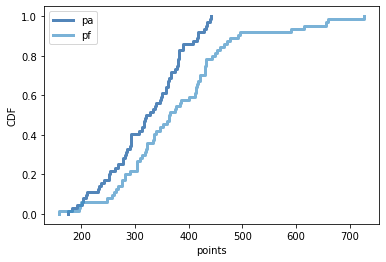

In [15]:
#CDF of points
pacdf = thinkstats2.Cdf(df1.pa, label='pa')
pfcdf = thinkstats2.Cdf(df1.pf, label='pf')

thinkplot.PrePlot(2)
thinkplot.Cdfs([pacdf, pfcdf])
thinkplot.Config(xlabel='points', ylabel='CDF')

C:\Users\Dan\Desktop\DSC530\ThinkStatsGithub\code\thinkstats2.py:2479: RuntimeWarning: Mean of empty slice.
  mean = xs.mean()
C:\Users\Dan\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Dan\Desktop\DSC530\ThinkStatsGithub\code\thinkstats2.py:2451: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(ds, ds) / (len(xs) - ddof)


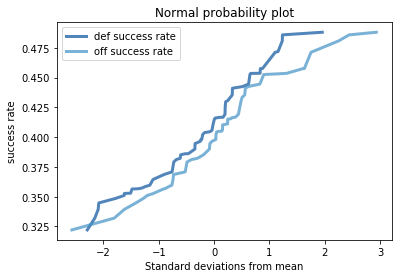

In [16]:
#Analytical Distribution
#Normal Probability Plot
mean, var = thinkstats2.TrimmedMeanVar(df1.offensesuccessRate, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

thinkplot.PrePlot(2) 
xs, ys = thinkstats2.NormalProbability(df1.defensesuccessRate)
thinkplot.Plot(xs, ys, label='def success rate')

xs, ys = thinkstats2.NormalProbability(df1.defensesuccessRate)
thinkplot.Plot(xs, ys, label='off success rate')
thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='success rate')

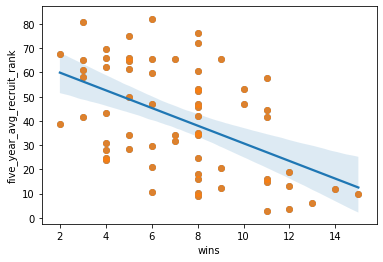

In [17]:
#Correlations
#Wins by Recruiting Ranking
# library & dataset
import seaborn as sns
 
# use the function regplot to make a scatterplot
sns.regplot(x=df1.wins, y=df1.five_year_avg_recruit_rank)
#sns.plt.show()
 
# Without regression fit:
sns.regplot(x=df1.wins, y=df1.five_year_avg_recruit_rank, fit_reg=False)
#sns.plt.show()


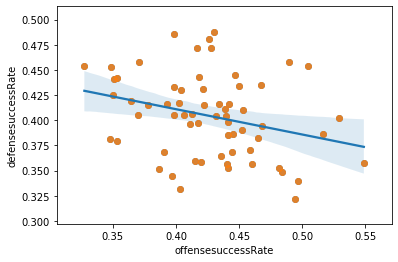

In [18]:
#Correlations
#Offensive vs Defensive Success Rate
# library & dataset
import seaborn as sns
 
# use the function regplot to make a scatterplot
sns.regplot(x=df1.offensesuccessRate, y=df1.defensesuccessRate)
#sns.plt.show()
 
# Without regression fit:
sns.regplot(x=df1.offensesuccessRate, y=df1.defensesuccessRate, fit_reg=False)
#sns.plt.show()

In [20]:
#Ch 9 Test correlation
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [23]:
#Correlation between wins and recruiting ranking
r = np.corrcoef(df1.wins, df1.five_year_avg_recruit_rank)
r

array([[ 1.       , -0.5040221],
       [-0.5040221,  1.       ]])

In [24]:
#Hypothesis Test
cleaned = df1.dropna(subset=['offensesuccessRate', 'defensesuccessRate'])
data = cleaned.wins.values, cleaned.five_year_avg_recruit_rank.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [26]:
#defense only metrics
#Using Nebraska actuals as test of predictions of model
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

#Get data
df = df1

  
X = df[['pa', 'five_year_avg_recruit_rank', 'defensesuccessRate','defensehavoctotal']] # here we have 2 variables for multiple regression. 
Y = df['wins']  
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn

New_PA = 333
New_recruit = 28.6
New_dsr = .415
New_dhavoc = .262
print ('Predicted Win Total: \n', regr.predict([[New_PA, New_recruit, New_dsr, New_dhavoc]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 14.445756556696821
Coefficients: 
 [-1.53654791e-02 -2.94323994e-02 -1.23210404e+01  1.79949731e+01]
Predicted Win Total: 
 [8.0887366]
                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     17.55
Date:                Thu, 28 May 2020   Prob (F-statistic):           1.54e-09
Time:                        22:09:32   Log-Likelihood:                -137.33
No. Observations:                  64   AIC:                             284.7
Df Residuals:                      59   BIC:                             295.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t  

In [27]:
#Multiple Regression
#offense only

import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

#Get data
df = df1

  
X = df[['pf', 'five_year_avg_recruit_rank', 'offensesuccessRate']] # here we have 2 variables for multiple regression. 
Y = df['wins']  
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn

New_PF = 336
New_recruit = 28.6
New_osr = .422
print ('Predicted Win Total: \n', regr.predict([[New_PF, New_recruit, New_osr]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 0.02629765315869026
Coefficients: 
 [ 0.02214777 -0.01792561 -1.13060758]
Predicted Win Total: 
 [6.47816069]
                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     55.21
Date:                Thu, 28 May 2020   Prob (F-statistic):           2.98e-17
Time:                        22:20:15   Log-Likelihood:                -120.03
No. Observations:                  64   AIC:                             248.1
Df Residuals:                      60   BIC:                             256.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025     

In [30]:
#All metrics
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

#Get data
df = df1

  
X = df[['pf','pa', 'five_year_avg_recruit_rank', 'offensesuccessRate', 'defensesuccessRate', 'defensehavoctotal']] # here we have 2 variables for multiple regression. 
Y = df['wins']  
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_PF = 336
New_PA = 333
New_recruit = 28.6
New_osr = .422
New_dsr = .415
New_dhavoc = .2625
print ('Predicted Wins: \n', regr.predict([[New_PF,New_PA, New_recruit, New_osr, New_dsr, New_dhavoc]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 2.7124759004389976
Coefficients: 
 [ 1.84762485e-02 -1.78181718e-02  4.06042429e-03  1.71642342e+00
  2.29281740e+00  6.44334022e+00]
Predicted Wins: 
 [6.47039903]
                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     60.34
Date:                Sat, 30 May 2020   Prob (F-statistic):           6.89e-23
Time:                        09:31:35   Log-Likelihood:                -98.578
No. Observations:                  64   AIC:                             211.2
Df Residuals:                      57   BIC:                             226.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                